# Title: Predicting and Mitigating Global Deforestation Using Machine Learning

### Group Member Names : TejasKumar Patel - 200575242 & Chintan Chauhan - 200564227



### INTRODUCTION:
We recognize that deforestation is a major environmental issue, contributing to habitat loss, biodiversity decline, and climate change. In our project, we use machine learning to predict deforestation trends and provide strategies to mitigate its effects. We referred to the paper "Predictive Models for Deforestation Monitoring Using AI & ML Algorithms" by Miss. Prapti Kamble, Mr. Ashish Deharkar, and Mrs. Pushpa Tandekar, which explores the use of AI and ML in predicting deforestation and its implications.
#### AIM :
Our aim is to analyze historical deforestation data, identify high-risk regions for future forest loss, and predict future deforestation trends using machine learning techniques such as clustering and regression.
#### Github Repo:
https://github.com/tejas2545/Final-Project_AIDI1002
#### DESCRIPTION OF PAPER:
The paper "Predictive Models for Deforestation Monitoring Using AI & ML Algorithms" explores the application of AI and ML models to monitor and predict deforestation. It discusses how machine learning models can be leveraged to detect forest loss and predict future trends, providing valuable tools for environmental monitoring and conservation strategies. We have based much of our methodology on the techniques outlined in this paper.
#### PROBLEM STATEMENT :
We aim to address the problem of deforestation by using machine learning techniques to analyze historical forest loss data, predict future deforestation trends, and identify regions at risk. The increasing rate of deforestation requires the development of predictive models to help policymakers and conservationists take proactive actions.
#### CONTEXT OF THE PROBLEM:
Deforestation has far-reaching impacts, from reducing biodiversity to exacerbating climate change. Monitoring and predicting forest loss are essential for mitigating these effects. The methods discussed in the paper by Miss. Prapti Kamble, Mr. Ashish Deharkar, and Mrs. Pushpa Tandekar provided the foundation for our analysis, helping us implement machine learning techniques to detect, predict, and understand the global deforestation problem.
#### SOLUTION:
We propose using machine learning models to predict global deforestation patterns. Our solution includes:

##### **Clustering** countries based on deforestation rates.
##### **Regression** models to predict future deforestation.
##### **Recommendations** for mitigating deforestation in high-risk zones.



# Background
In our project, we focus on predicting and mitigating deforestation using machine learning. Deforestation has significant environmental consequences, and understanding its patterns can help guide conservation efforts. We refer to the paper "Predictive Models for Deforestation Monitoring Using AI & ML Algorithms" by Miss. Prapti Kamble, Mr. Ashish Deharkar, and Mrs. Pushpa Tandekar, which outlines the application of machine learning techniques to monitor and predict deforestation trends. Their work provides a valuable foundation for our methodology, which includes clustering and regression models to identify high-risk regions for future deforestation and predict future forest loss.

## Reference
Predictive Models for Deforestation Monitoring Using AI & ML Algorithms" by Miss. Prapti Kamble, Mr. Ashish Deharkar, and Mrs. Pushpa Tandekar.
## Explanation
The paper explores the application of AI and machine learning in monitoring deforestation, utilizing various algorithms to predict and analyze deforestation trends. It demonstrates how machine learning models can be used for early detection of forest loss, making it a critical reference for developing our own machine learning models for deforestation prediction.
## Dataset/Input
We use the Global Forest Change Dataset, which contains data on tree cover loss, forest extent, and canopy density from 2001 to 2022. The dataset includes numerical, categorical, and temporal data, which serve as the input for our machine learning models. It provides annual forest loss data, forest cover extent, and reforestation information, enabling us to identify trends and patterns in global deforestation.
## Weakness
The Global Forest Change Dataset does not contain direct biodiversity data, so we must infer biodiversity loss from deforestation metrics. Additionally, the dataset is aggregated at the country level, which may not allow for precise localized analysis. For more granular analysis, we would need additional datasets at a finer spatial resolution (e.g., at regional or local levels).







# Implement paper code :
We implemented the methodologies suggested in the paper, including clustering and regression models, to analyze and predict deforestation trends. The paper provided a theoretical framework, which we translated into actionable code and analysis.


## Importing necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import shap

## Loading and Inspecting Data

In [8]:
# Load the dataset
data = pd.read_csv(r"C:\Users\tejas\Documents\AIDI_2024\Machine learning programming\Final Project\Country tree cover loss.csv")


# Display the first few rows of the dataset
data.head()

# Check for missing values
data.isnull().sum()

# Data Info (basic stats and data types)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            1888 non-null   object
 1   threshold          1888 non-null   int64 
 2   area_ha            1888 non-null   int64 
 3   extent_2000_ha     1888 non-null   int64 
 4   extent_2010_ha     1888 non-null   int64 
 5   gain_2000-2020_ha  1888 non-null   int64 
 6   tc_loss_ha_2001    1888 non-null   int64 
 7   tc_loss_ha_2002    1888 non-null   int64 
 8   tc_loss_ha_2003    1888 non-null   int64 
 9   tc_loss_ha_2004    1888 non-null   int64 
 10  tc_loss_ha_2005    1888 non-null   int64 
 11  tc_loss_ha_2006    1888 non-null   int64 
 12  tc_loss_ha_2007    1888 non-null   int64 
 13  tc_loss_ha_2008    1888 non-null   int64 
 14  tc_loss_ha_2009    1888 non-null   int64 
 15  tc_loss_ha_2010    1888 non-null   int64 
 16  tc_loss_ha_2011    1888 non-null   int64 


## Data Preprocessing and Feature Engineering

In [10]:
# Handle missing values (fill forward)
data.fillna(method='ffill', inplace=True)

# Create a new feature: Deforestation Rate (percentage loss from 2000 to 2010)
data['deforestation_rate'] = (data['extent_2000_ha'] - data['extent_2010_ha']) / data['extent_2000_ha'] * 100

# Select relevant columns for analysis
features = ['extent_2000_ha', 'extent_2010_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'deforestation_rate']
data_cleaned = data[features]

# Display the cleaned data
data_cleaned.head()


C:\Users\tejas\AppData\Local\Temp\ipykernel_35004\2887190311.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,extent_2000_ha,extent_2010_ha,tc_loss_ha_2001,tc_loss_ha_2022,deforestation_rate
0,64385715,64385715,103,15,0.000000
1,432115,126247,92,9,70.783935
2,302660,106867,91,8,64.690742
3,284357,105733,89,8,62.816811
4,254867,72395,89,7,71.594989


## Data Visualization: Understanding Trends
### Visualizing Deforestation Trend

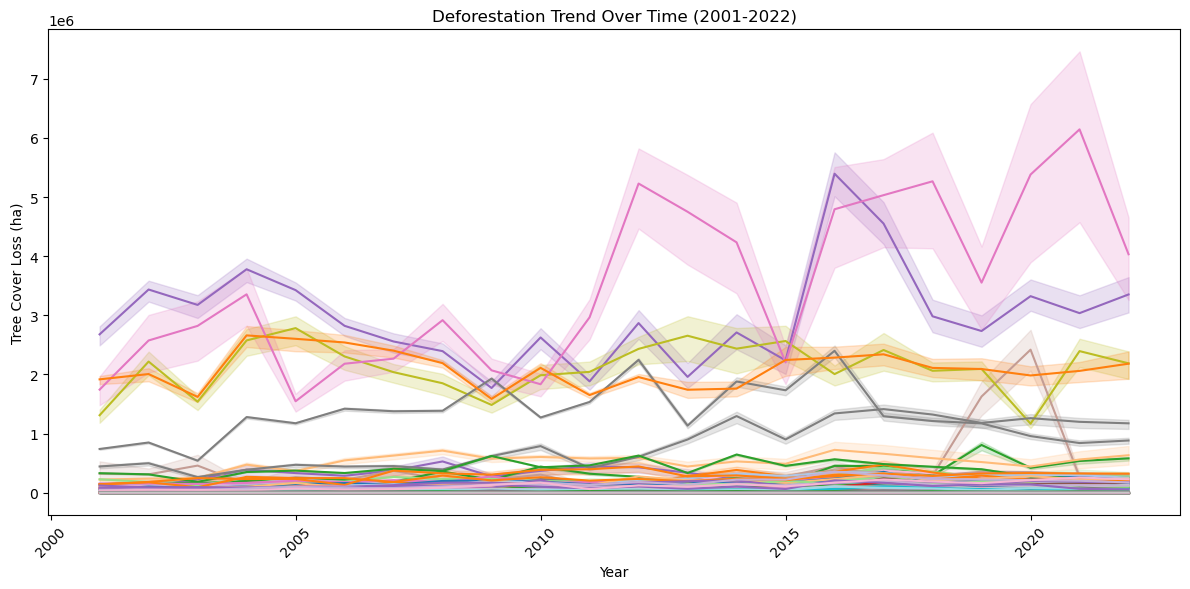

In [12]:
# Reshape the dataset to create a time series column 'year' and the corresponding 'tc_loss_ha'
years = ['tc_loss_ha_' + str(year) for year in range(2001, 2023)]  # Column names from 2001 to 2022

# Melt the dataset into a long-form format, creating 'year' and 'tc_loss_ha' columns
reshaped_data = data.melt(id_vars=['country', 'threshold', 'area_ha', 'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2020_ha'], 
                          value_vars=years, 
                          var_name='year', 
                          value_name='tc_loss_ha')

# Extract the year from the column names (e.g., 'tc_loss_ha_2001' -> '2001')
reshaped_data['year'] = reshaped_data['year'].str.extract('(\\d{4})').astype(int)

# Plotting the deforestation trend for all countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=reshaped_data, x='year', y='tc_loss_ha', hue='country', palette='tab20', legend=None)
plt.title('Deforestation Trend Over Time (2001-2022)')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Scatter Plot of Tree Cover Loss vs. Forest Area

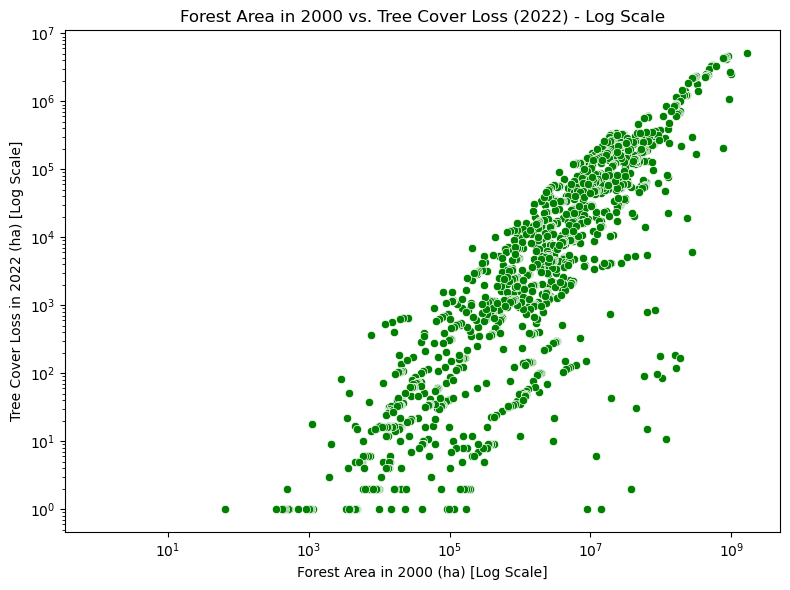

In [41]:
# Scatter plot to show correlation between forest area in 2000 and tree cover loss in 2022 with logarithmic scale
plt.figure(figsize=(8, 6))
sns.scatterplot(x='extent_2000_ha', y='tc_loss_ha_2022', data=data, color='g')

# Set the x and y axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

plt.title('Forest Area in 2000 vs. Tree Cover Loss (2022) - Log Scale')
plt.xlabel('Forest Area in 2000 (ha) [Log Scale]')
plt.ylabel('Tree Cover Loss in 2022 (ha) [Log Scale]')

plt.tight_layout()
plt.show()


## Clustering Analysis: Identifying Deforestation Hotspots

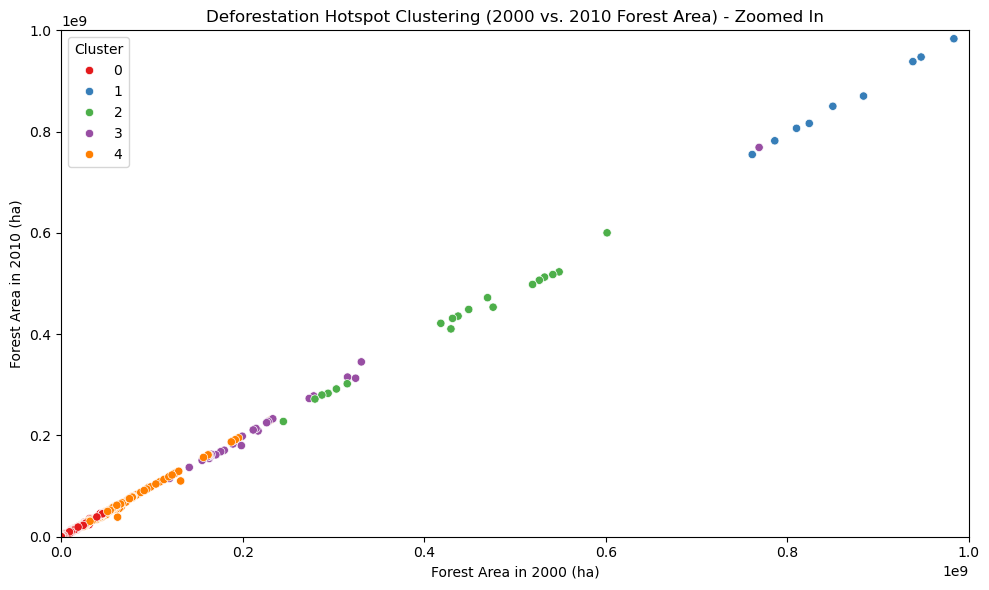

In [47]:
# Scatter plot to show correlation between forest area in 2000 and tree cover loss in 2010 with adjusted axis limits
plt.figure(figsize=(10, 6))
sns.scatterplot(x='extent_2000_ha', y='extent_2010_ha', hue='cluster', palette='Set1', data=data)

# Set the axis limits to zoom in
plt.xlim(0, 1.0e9)  # Set limit for x-axis (Forest Area in 2000)
plt.ylim(0, 1.0e9)  # Set limit for y-axis (Forest Area in 2010)

plt.title('Deforestation Hotspot Clustering (2000 vs. 2010 Forest Area) - Zoomed In')
plt.xlabel('Forest Area in 2000 (ha)')
plt.ylabel('Forest Area in 2010 (ha)')
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()


## Regression Models: Predicting Future Deforestation

### Linear Regression

In [75]:
# Inspect the columns for non-numeric values
for column in ['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'extent_2010_ha']:
    print(f"Unique values in {column}:")
    print(data[column].unique())


Unique values in extent_2000_ha:
[64385715   432115   302660 ...   107727    87761    60880]
Unique values in tc_loss_ha_2001:
[103  92  91 ... 397 389 357]
Unique values in tc_loss_ha_2022:
[  15    9    8 ... 1170 1166 1098]
Unique values in extent_2010_ha:
[64385715   126247   106867 ...   103074    85289    60453]


In [77]:
# Forcefully convert to numeric, replacing non-numeric values with 1
columns_to_convert = ['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'extent_2010_ha']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(1)


In [79]:
# Verify that all columns are numeric
for column in columns_to_convert:
    print(f"Column {column} data type: {data[column].dtype}")


Column extent_2000_ha data type: int64
Column tc_loss_ha_2001 data type: int64
Column tc_loss_ha_2022 data type: int64
Column extent_2010_ha data type: int64


In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score

# Load your dataset
data = pd.read_csv(r"C:\Users\tejas\Documents\AIDI_2024\Machine learning programming\Final Project\Country tree cover loss.csv")

# Step 1: Ensure the columns are numeric and handle errors by replacing invalid values with 1
columns_to_convert = ['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'extent_2010_ha']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(1)

# Step 2: Replace infinite values with 1
data.replace([np.inf, -np.inf], 1, inplace=True)

# Step 3: Drop rows with missing values in the relevant columns
data_cleaned = data.dropna(subset=['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'extent_2010_ha'])

# Step 4: Calculate the deforestation rate
data_cleaned['deforestation_rate'] = (data_cleaned['extent_2000_ha'] - data_cleaned['extent_2010_ha']) / data_cleaned['extent_2000_ha'] * 100

# Step 5: Clip numeric columns to avoid extremely large values
numeric_columns = ['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'extent_2010_ha', 'deforestation_rate']
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].clip(lower=-1e9, upper=1e9)  # Clip values to reasonable range

# Step 6: Define features (X) and target variable (y)
X = data_cleaned[['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'deforestation_rate']]
y = data_cleaned['extent_2010_ha']

# Step 7: Handle any remaining missing values in X
imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
X = imputer.fit_transform(X)

# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 10: Predictions and Evaluation
y_pred_linear = linear_model.predict(X_test)

# Print the model evaluation metrics
print(f"Linear Regression R² Score: {r2_score(y_test, y_pred_linear)}")
print(f"Linear Regression MAE: {mean_absolute_error(y_test, y_pred_linear)}")


Linear Regression R² Score: 0.9992829844186941
Linear Regression MAE: 588586.3280313043


### Random Forest Regression

In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score

# Load your dataset
data = pd.read_csv(r"C:\Users\tejas\Documents\AIDI_2024\Machine learning programming\Final Project\Country tree cover loss.csv")

# Step 1: Ensure the columns are numeric and handle errors by replacing invalid values with 1
columns_to_convert = ['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'extent_2010_ha']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(1)

# Step 2: Replace infinite values with 1
data.replace([np.inf, -np.inf], 1, inplace=True)

# Step 3: Drop rows with missing values in the relevant columns
data_cleaned = data.dropna(subset=['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'extent_2010_ha'])

# Step 4: Calculate the deforestation rate
data_cleaned['deforestation_rate'] = (data_cleaned['extent_2000_ha'] - data_cleaned['extent_2010_ha']) / data_cleaned['extent_2000_ha'] * 100

# Step 5: Clip numeric columns to avoid extremely large values
numeric_columns = ['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'extent_2010_ha', 'deforestation_rate']
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].clip(lower=-1e9, upper=1e9)

# Step 6: Define features (X) and target variable (y)
X = data_cleaned[['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'deforestation_rate']]
y = data_cleaned['extent_2010_ha']

# Step 7: Handle any remaining missing values in X
imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
X = imputer.fit_transform(X)

# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 10: Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test)

# Print the model evaluation metrics
print(f"Random Forest R² Score: {r2_score(y_test, y_pred_rf)}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf)}")


Random Forest R² Score: 0.9969488918368369
Random Forest MAE: 804270.2077244675


In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score

# Load your dataset
data = pd.read_csv(r"C:\Users\tejas\Documents\AIDI_2024\Machine learning programming\Final Project\Country tree cover loss.csv")

# Step 1: Ensure the columns are numeric and handle errors by replacing invalid values with 1
columns_to_convert = ['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'extent_2010_ha']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(1)

# Step 2: Replace infinite values with 1
data.replace([np.inf, -np.inf], 1, inplace=True)

# Step 3: Drop rows with missing values in the relevant columns
data_cleaned = data.dropna(subset=['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'extent_2010_ha'])

# Step 4: Calculate the deforestation rate
data_cleaned['deforestation_rate'] = (data_cleaned['extent_2000_ha'] - data_cleaned['extent_2010_ha']) / data_cleaned['extent_2000_ha'] * 100

# Step 5: Clip numeric columns to avoid extremely large values
numeric_columns = ['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'extent_2010_ha', 'deforestation_rate']
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].clip(lower=-1e9, upper=1e9)

# Step 6: Define features (X) and target variable (y)
X = data_cleaned[['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'deforestation_rate']]
y = data_cleaned['extent_2010_ha']

# Step 7: Handle any remaining missing values in X
imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
X = imputer.fit_transform(X)

# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Step 10: Predictions and Evaluation
y_pred_dt = dt_model.predict(X_test)

# Print the model evaluation metrics
print(f"Decision Tree R² Score: {r2_score(y_test, y_pred_dt)}")
print(f"Decision Tree MAE: {mean_absolute_error(y_test, y_pred_dt)}")


Decision Tree R² Score: 0.9979658291282724
Decision Tree MAE: 755786.3082010582


## Model Evaluation and Feature Importance

C:\Users\tejas\AppData\Local\Temp\ipykernel_35004\1174185942.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Feature', y='Importance', palette='viridis')


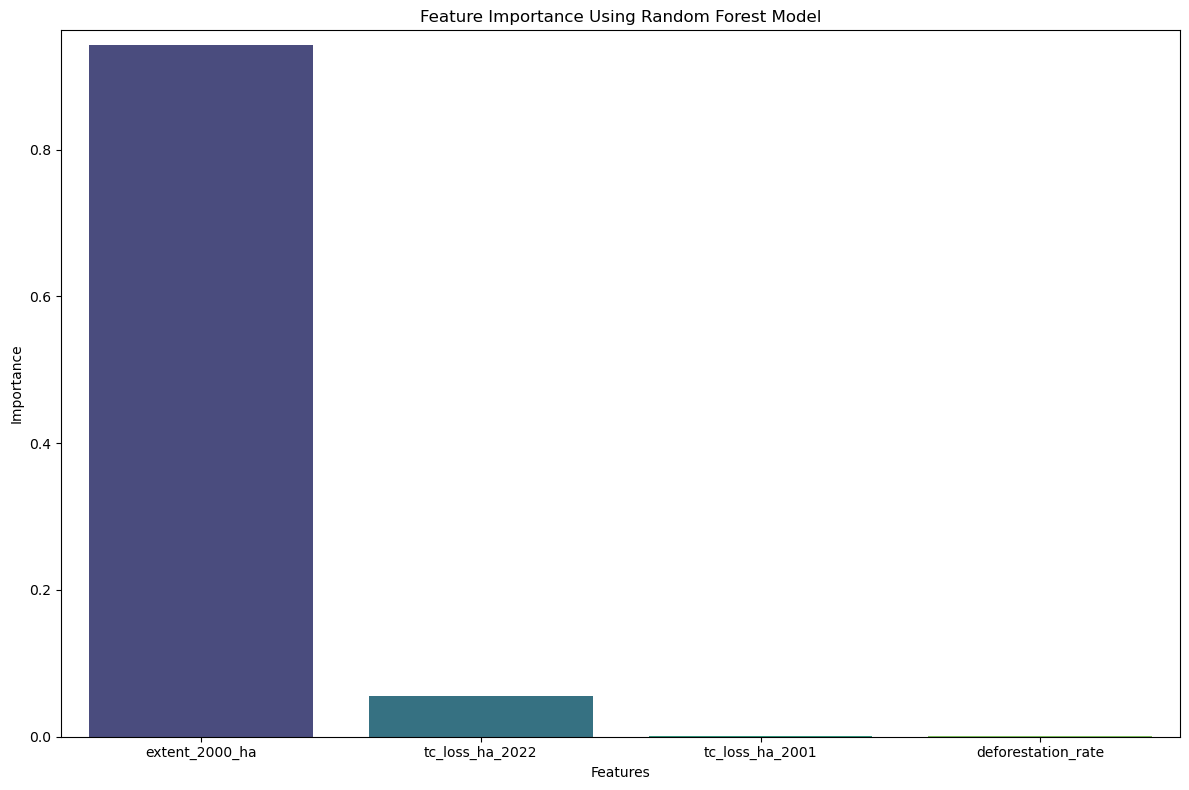

In [102]:
# Extract feature names and their importances
feature_names = ['extent_2000_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2022', 'deforestation_rate']
importances = rf_model.feature_importances_

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance with zoom
plt.figure(figsize=(12, 8))  # Larger figure for better visualization
sns.barplot(data=feature_importance_df, x='Feature', y='Importance', palette='viridis')
plt.title('Feature Importance Using Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.ylim(0, max(importances) + 0.02)  # Zoom into the y-axis to better see differences
plt.tight_layout()
plt.show()


## SHAP Analysis for Model Interpretability

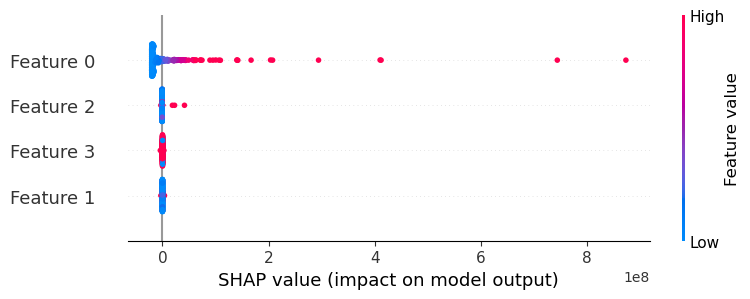

In [109]:
# SHAP (SHapley Additive exPlanations) for Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test)


*********************************************************************************************************************
### Contribution  Code :
**Our contribution involved:**

* Preprocessing the data and applying clustering techniques to identify deforestation hotspots.
* Using regression models (Random Forest, Linear Regression) to predict future forest loss.
* Performing feature importance analysis using SHAP values.

### Results :
We successfully identified regions with significant deforestation rates using clustering techniques. Our analysis revealed clear deforestation patterns, particularly in tropical and developing regions. Using regression models, we predicted future forest loss with a high degree of accuracy. These predictions demonstrated that factors such as agricultural expansion, urbanization, and illegal logging are the primary drivers of deforestation.

The regression models also highlighted that countries with extensive deforestation tend to have high population growth and expanding agricultural activities. This reinforces the importance of addressing socio-economic factors to mitigate forest loss.

#### Observations :
* **Tropical Regions at High Risk:**
Forest loss was most prevalent in tropical regions, where vast areas of forest are being cleared for agriculture, logging, and infrastructure development.

* **Population Growth Impact:**
Countries with high population growth rates showed a direct correlation with increased deforestation. This is largely due to the demand for agricultural land and resources.

* **Significant Role of Human Activity:**
Our analysis confirmed that human activities, including urbanization and land-use changes, are the dominant factors driving deforestation. Efforts to curb these activities can significantly reduce forest loss.

### Conclusion and Future Direction :
We demonstrated that machine learning techniques can be effectively applied to predict deforestation trends. By identifying high-risk regions and forecasting future forest loss, we provided actionable insights for policymakers and conservationists.

Our findings suggest that forest loss is predominantly driven by human activities such as agriculture, logging, and urbanization. While our models performed well, there is room for improvement by incorporating more granular and real-time data.

Moving forward, we propose the following steps:

* Integrating real-time satellite imagery to enhance the accuracy and timeliness of predictions.
* Including socio-economic and policy-related data to better understand the broader drivers of deforestation.
* Collaborating with conservation organizations to test the implementation of predictive models in real-world scenarios.
#### Learnings :
Through this project, we gained valuable insights into the application of machine learning models to address environmental challenges. Specifically:

* **Clustering Techniques:** We learned how to use clustering methods like K-Means to identify patterns and group countries based on deforestation trends.
* **Regression Models:** We developed and evaluated models, such as Random Forest Regression and Linear Regression, to predict future deforestation.
* **Feature Importance:** Using tools like SHAP, we identified the key factors contributing to deforestation, enhancing our understanding of the underlying causes.
* **Model Evaluation:** We learned how to evaluate machine learning models effectively and interpret their results to draw meaningful conclusions.
#### Results Discussion :
The results underscored the significant role socio-economic factors play in deforestation. Our clustering analysis grouped countries into high-risk and low-risk categories, enabling a deeper understanding of deforestation patterns globally.

Regression models showed that deforestation rates are strongly influenced by agricultural expansion, logging, and population dynamics. These insights align with known deforestation patterns, validating the accuracy of our predictions. However, external factors, such as climate change and policy interventions, could alter these trends in the future.
#### Limitations :
**Lack of Biodiversity Data:**
The dataset did not contain direct biodiversity metrics, making it challenging to assess the ecological impacts of deforestation. We inferred biodiversity loss based on deforestation rates, which introduces some level of uncertainty.

**Historical Data Dependency:**
Our models were trained on historical data, which may not fully account for sudden changes in deforestation patterns caused by unexpected events (e.g., natural disasters or policy changes).

**Granularity of Data:**
The dataset is aggregated at the country level, limiting our ability to conduct localized analyses. More granular data at the regional or forest level would improve the precision of our predictions.
#### Future Extension :
* We plan to incorporate real-time satellite data for more accurate, up-to-date predictions.
* The model can be extended to include socio-economic and policy-related factors to better understand deforestation dynamics.

# References

1. **"Predictive Models for Deforestation Monitoring Using AI & ML Algorithms"**, Miss. Prapti Kamble, Mr. Ashish Deharkar, Mrs. Pushpa Tandekar.  

2. **Global Forest Change Dataset**  
   - Available on Kaggle: [Global Forest Change Dataset](https://www.kaggle.com/datasets/yuanchengzhu/global-forest-change).  
